#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Loading the csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes (1).csv to diabetes (1).csv


In [ ]:
df = pd.read_csv("diabetes (1).csv")  # Replace with your CSV path


#Understanding dataset

In [ ]:
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nStatistical summary:\n", df.describe())
print("\nTarget variable distribution:\n", df['Outcome'].value_counts())


Shape of dataset: (768, 9)

Columns in dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168 

#Exploratory Data Analysis (EDA)

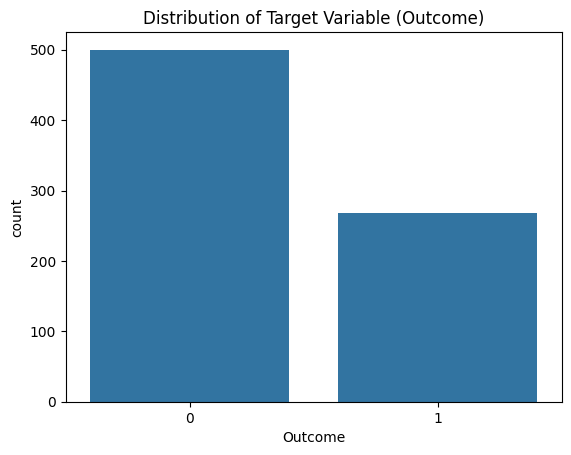

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Target Variable (Outcome)")
plt.show()


#Histograms for all features

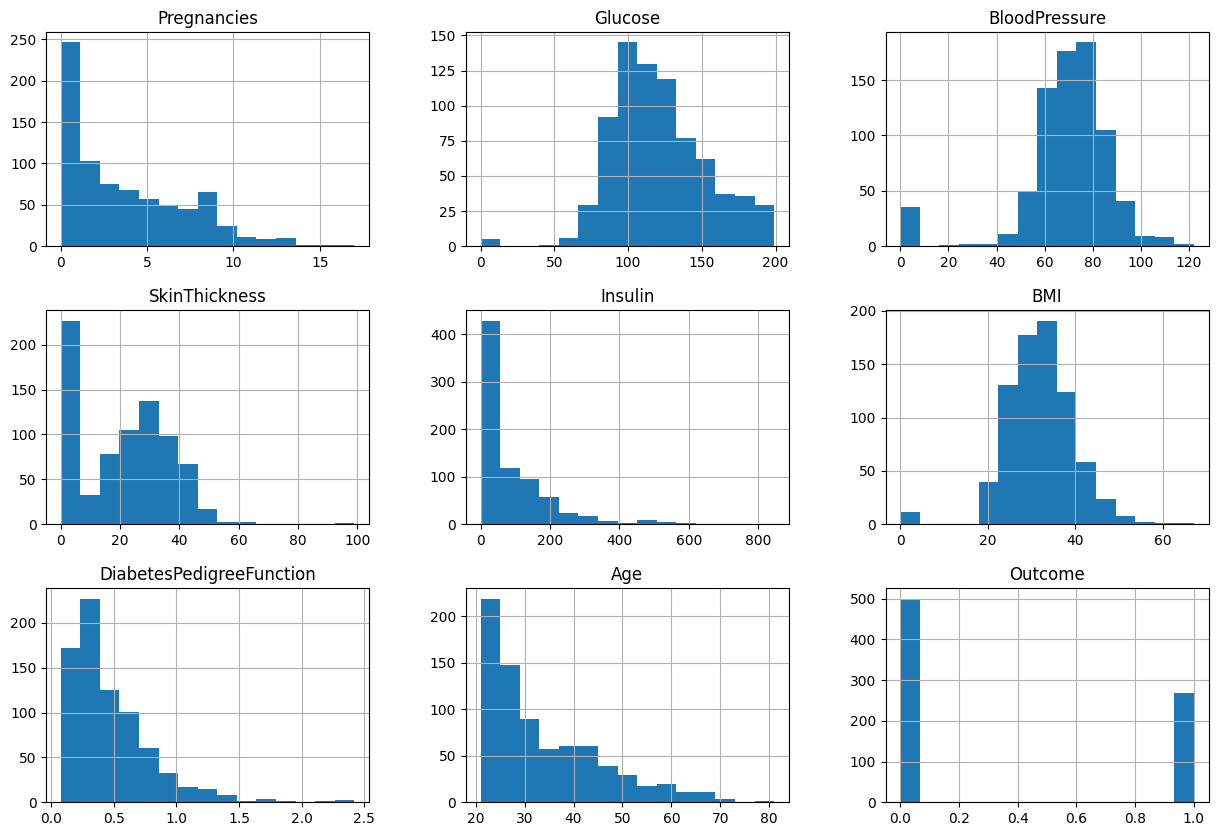

In [ ]:
df.hist(bins=15, figsize=(15,10))
plt.show()

# Correlation heatmap

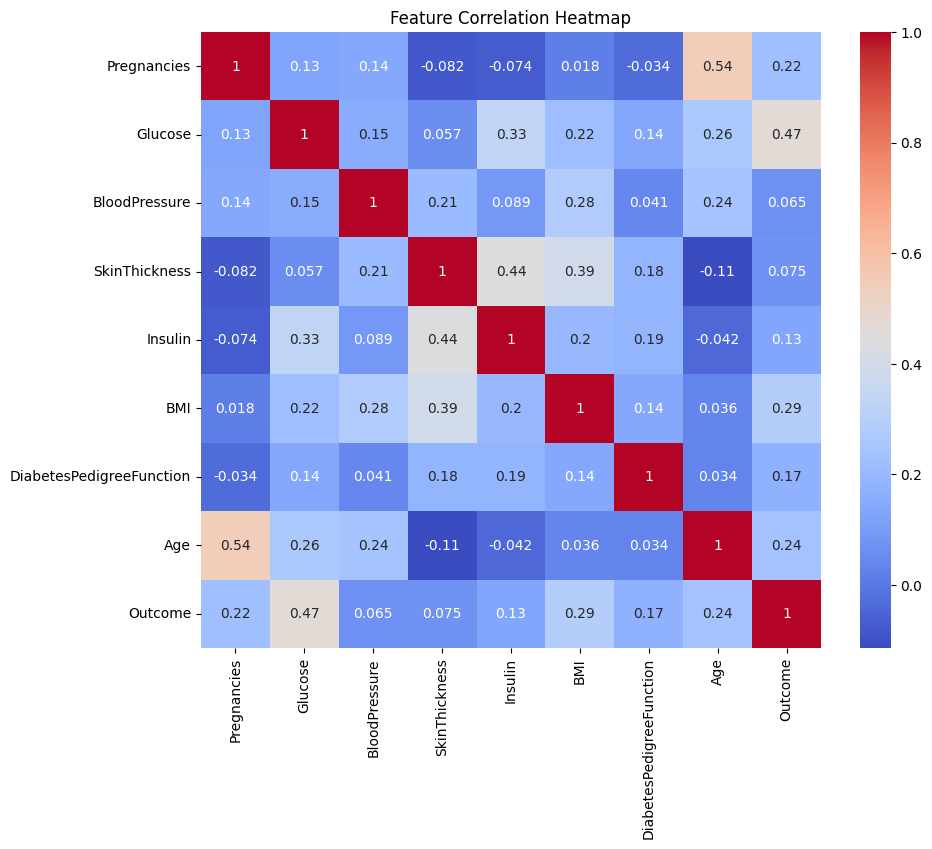

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots to check outliers

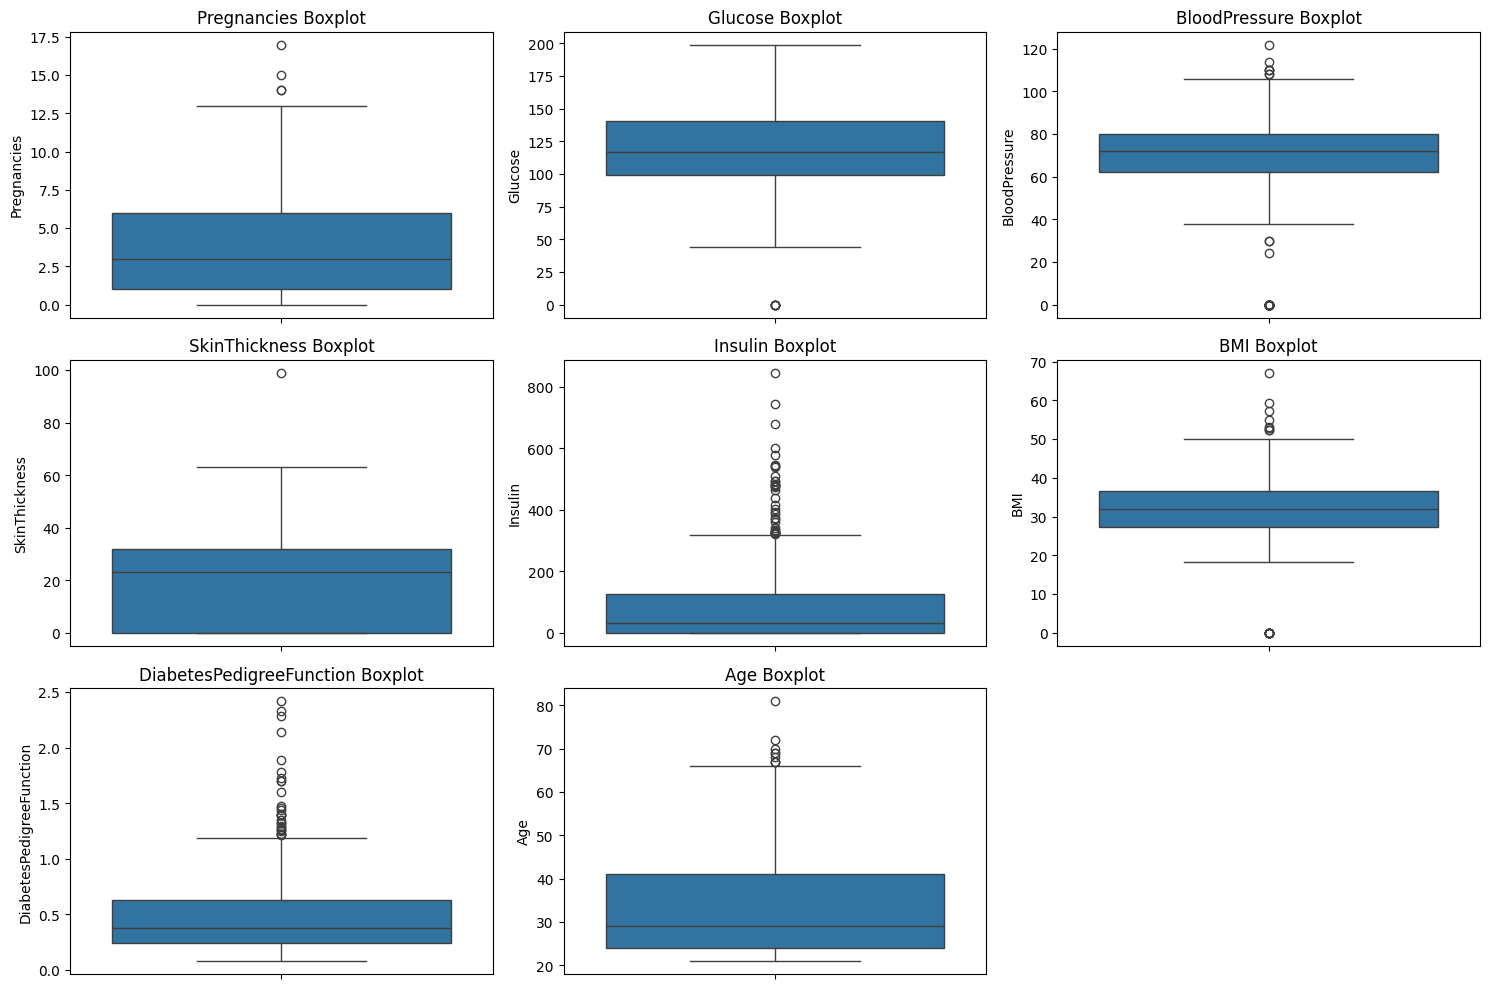

In [ ]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[column])
    plt.title(f"{column} Boxplot")
plt.tight_layout()
plt.show()

#Data Cleaning

In [ ]:
# Columns where zero is invalid
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [ ]:
# Fill NaN with median
for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-2050203558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Optional: Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]


#Feature Scaling

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#Model Training

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Evalution

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        46
           1       0.67      0.62      0.64        29

    accuracy                           0.73        75
   macro avg       0.72      0.71      0.72        75
weighted avg       0.73      0.73      0.73        75



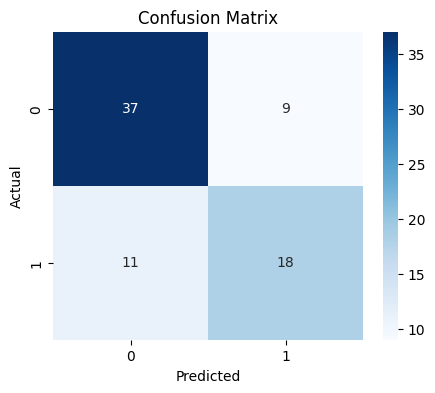

In [ ]:
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Predict on new data

#Predicting diabetes for a new person

In [ ]:
new_patient_df = pd.DataFrame([{
    'Pregnancies': 3,
    'Glucose': 145,
    'BloodPressure': 82,
    'SkinThickness': 32,
    'Insulin': 130,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 45
}])

new_patient_scaled = scaler.transform(new_patient_df)

prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)

if prediction[0] == 1:
    print("Prediction: The person is likely DIABETIC")
else:
    print("Prediction: The person is likely NON-DIABETIC")

print("Probability of Diabetes:", probability[0][1])


Prediction: The person is likely DIABETIC
Probability of Diabetes: 0.6072906426217677
